In [13]:
# Imports & Drive mount
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

sns.set(style="whitegrid")

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#  Load the clustered dataset
file_path = '/content/drive/MyDrive/Study Track AI based Student Study Habit Recommender/Milestone_2_Clustering/clustered_customer_data.csv'
data = pd.read_csv(file_path)


print("Rows,Cols:", data.shape)
data.head()


Rows,Cols: (20000, 5)


,customer_id,sex,customer_age,tenure,Cluster
0,9798859,Male,44.0,93,2
1,11413563,Male,36.0,65,2
2,818195,Male,35.0,129,2
3,12049009,Male,33.0,58,0
4,10083045,Male,42.0,88,2


In [15]:
#  Basic cluster analysis (fixed)
if 'Cluster' not in data.columns:
    raise KeyError("Column 'Cluster' not found. Make sure your Milestone 2 output has the 'Cluster' column.")

print("Cluster counts:")
print(data['Cluster'].value_counts().sort_index())

print("\nCluster summary (numeric columns only):")
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Compute summary stats for numeric columns only
summary = data.groupby('Cluster')[numeric_cols].agg(['count', 'mean', 'median']).T
display(summary)


Cluster counts:
Cluster
0    12873
1     2102
2     5025
Name: count, dtype: int64

Cluster summary (numeric columns only):


Cluster                         0             1             2
customer_id  count   1.287300e+04  2.102000e+03  5.025000e+03
             mean    2.158114e+07  1.525438e+07  8.383927e+06
             median  1.989679e+07  1.521220e+07  9.781275e+06
customer_age count   1.287300e+04  2.102000e+03  5.025000e+03
             mean    6.092752e+01  2.022000e+03  4.176856e+01
             median  3.600000e+01  2.022000e+03  3.500000e+01
tenure       count   1.287300e+04  2.102000e+03  5.025000e+03
             mean    2.694857e+01  3.693530e+01  9.221672e+01
             median  2.600000e+01  3.700000e+01  9.300000e+01
Cluster      count   1.287300e+04  2.102000e+03  5.025000e+03
             mean    0.000000e+00  1.000000e+00  2.000000e+00
             median  0.000000e+00  1.000000e+00  2.000000e+00

In [16]:
#  Recommendation engine function
def recommend_for_student(row):
    """
    Inputs: a dataframe row with at least 'Cluster', optionally other features like age, tenure.
    Returns: tuple (short_recommendation, detailed_recommendation)
    """
    cluster = int(row['Cluster'])
    age = row.get('customer_age', np.nan)
    tenure = row.get('tenure', np.nan)

    # Customize mapping to your data/insights from Milestone 2.
    if cluster == 0:
        short = "Maintain & Sharpen"
        detail = (
            "You are consistently performing well. Keep your study routine and add weekly mock tests. "
            "Spend 1–2 hours on active recall and 30–45 mins on weak-topic revision. Use tools: Anki (spaced repetition), "
            "Quizlet, and time-blocked Pomodoro sessions (25/5). Consider peer-teaching twice a week."
        )
    elif cluster == 1:
        short = "Boost Consistency"
        detail = (
            "Moderate performance — increase study regularity. Plan 2–3 focused study slots (1.5–2 hrs each) across weekdays. "
            "Use weekly trackers (Google Sheets) and set micro-goals for assignments. Tools: Forest (focus app), Notion for scheduling."
        )
    elif cluster == 2:
        short = "Structured Onboarding"
        detail = (
            "New or low-engagement profile. Start with a simple schedule: 45–60 mins daily study, prioritize core topics. "
            "Use checklists and short practice sessions. Try guided courses (Coursera/YouTube) and mentorship. "
            "Focus on attendance and assignment completion first, then increase study hours gradually."
        )
    else:
        short = "General Improvement Plan"
        detail = (
            "Cluster mapping not recognized. Start with baseline: daily 1 hour focused study, weekly review, and active practice. "
            "Use basic time management tools and revisit Milestone 2 cluster definitions."
        )

    # Personalize slightly using age/tenure if available
    if not np.isnan(age):
        if age < 20:
            detail += " (Tip: shorter concentrated sessions work well for younger learners.)"
        elif age >= 30:
            detail += " (Tip: consider scheduling study around professional/college obligations.)"

    return short, detail

# Apply engine to dataset and create required columns
data['Recommendation'] = data.apply(lambda r: recommend_for_student(r)[0], axis=1)
data['Recommendation_Details'] = data.apply(lambda r: recommend_for_student(r)[1], axis=1)

# Quick peek
data[['customer_id','customer_age','tenure','Cluster','Recommendation']].head()


,customer_id,customer_age,tenure,Cluster,Recommendation
0,9798859,44.0,93,2,Structured Onboarding
1,11413563,36.0,65,2,Structured Onboarding
2,818195,35.0,129,2,Structured Onboarding
3,12049009,33.0,58,0,Maintain & Sharpen
4,10083045,42.0,88,2,Structured Onboarding


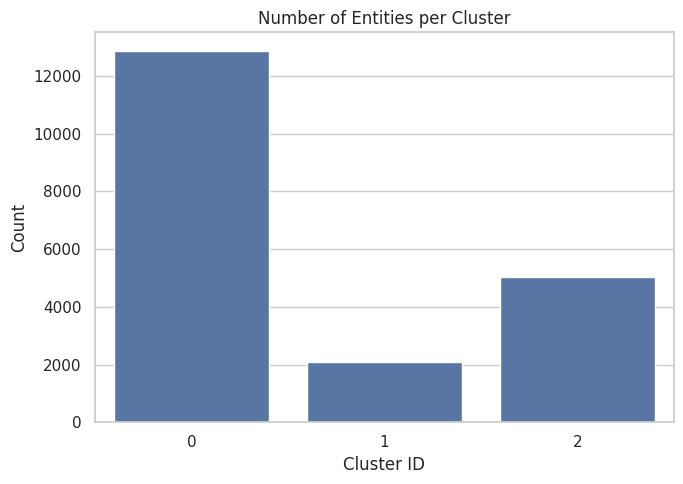

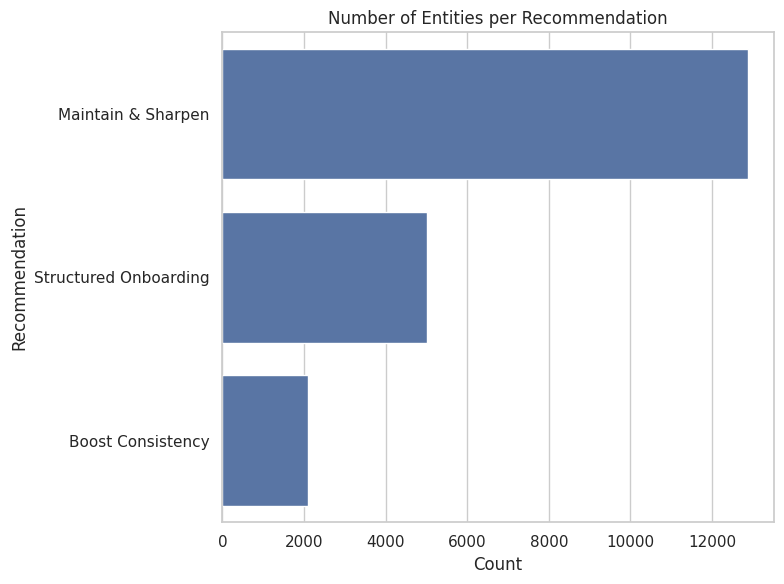

In [17]:
import os

out_path = '/content/output'
os.makedirs(os.path.join(out_path,'visualizations'), exist_ok=True)
viz_path = os.path.join(out_path,'visualizations')

# 1) Countplot by Cluster
plt.figure(figsize=(7,5))
sns.countplot(x='Cluster', data=data, order=sorted(data['Cluster'].unique()))
plt.title('Number of Entities per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(viz_path,'cluster_countplot.png'))
plt.show()

# 2) Countplot by Recommendation (short)
plt.figure(figsize=(8,6))
order = data['Recommendation'].value_counts().index
sns.countplot(y='Recommendation', data=data, order=order)
plt.title('Number of Entities per Recommendation')
plt.xlabel('Count')
plt.ylabel('Recommendation')
plt.tight_layout()
plt.savefig(os.path.join(viz_path,'recommendation_countplot.png'))
plt.show()

In [18]:
# List created folder
!ls -R Milestone_3_Recommendation


ls: cannot access 'Milestone_3_Recommendation': No such file or directory
